# Снижение размерности
Представьте, что вы работаете в международной гуманитарной организации, главная задача которой — борьба с бедностью и помощь людям из наименее развитых стран. Для выполнения своей миссии ваша организация периодически финансирует различные проекты, поддерживающие нуждающиеся регионы.

Вы собрали 100 миллионов долларов и должны принять решение, как распределить эти деньги — в какие страны их направить в первую очередь. Как выбрать, кто сильнее всего нуждается в финансовой поддержке?

Конечно, можно взять страны с самыми низкими доходами населения или с самой маленькой продолжительностью жизни. А может, лучше помочь странам, у которых самая высокая инфляция? По отдельным признакам выбирать достаточно сложно — нам хотелось бы выявить группы стран, в которых в целом ситуация вызывает опасения по совокупности значений всех признаков.

## Попробуем выделить кластеры стран, схожих по своим характеристикам, и среди них выявить кластер особо нуждающихся

In [1]:
# для автозагрузки изменений в модулях без необходимости перезагрузки kelner
%load_ext autoreload
%autoreload 2

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# необходимо для корректного импорта своих модулей в JupyterLab
import sys
current_dir = sys.path[0]
project_dir = 'SF_DS_Pro'
last_position = current_dir.find(project_dir) + len(project_dir)
project_path = current_dir[:last_position]
sys.path.append(project_path)

import Handlers as hd

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn import set_config
set_config(transform_output = 'pandas')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# sns.set_theme('notebook')
# sns.set_palette('Set2')

plt.rcParams['figure.figsize'] = (12, 8)

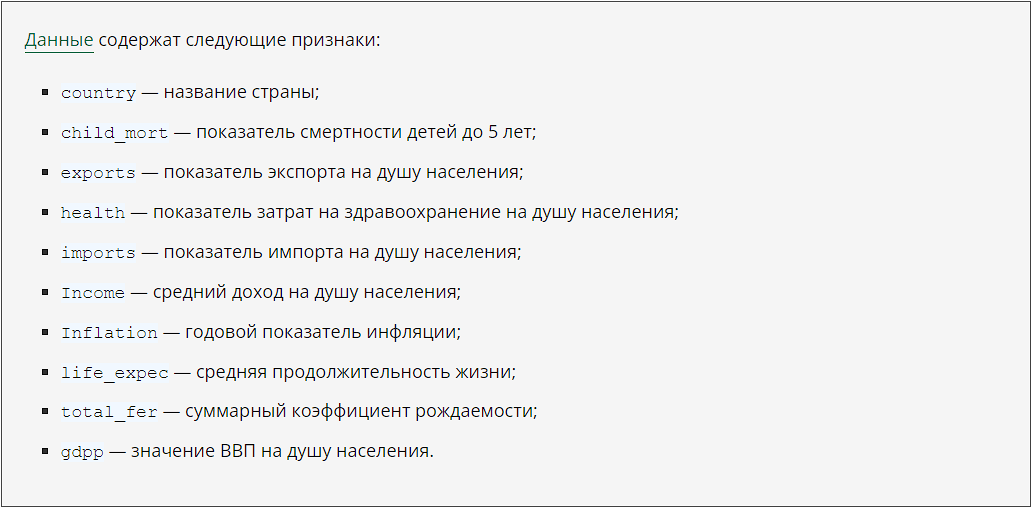

In [3]:
df = pd.read_csv('data/Country-data.zip')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### Проверка уникальности признаков

In [4]:
df.nunique() / df.shape[0] * 100

country       100.000000
child_mort     83.233533
exports        88.023952
health         88.023952
imports        90.419162
income         93.413174
inflation      93.413174
life_expec     76.047904
total_fer      82.634731
gdpp           94.011976
dtype: float64

country полностью уникальный признак, фактически идентификатор, его конечно нельзя использовать

In [5]:
X = df.drop(columns='country')

### Задание 7.1

Каково максимальное значение показателя средней продолжительности жизни среди представленных стран? Ответ округлите до одного знака после точки-разделителя.

In [6]:
X['life_expec'].max()

82.8

### Задание 7.2
Чтобы получить более качественные результаты, необходимо стандартизировать данные. Используйте для этого StandardScaler. Примените его ко всем значениям признаков и впишите в качестве ответа значение первого признака для первого объекта (таким образом можно будет проверить, что вы всё сделали корректно). Ответ округлите до двух знаков после точки-разделителя.

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
round(X.iloc[0, 0], 2)

1.29

### Задание 7.3
Как вы помните, нет смысла использовать сильно связанные друг с другом признаки, так как их можно преобразовать в один и таким образом уменьшить общее количество признаков. Давайте выясним, есть ли в данных такие признаки.

Постройте матрицу корреляций для всех признаков. Найдите максимальный коэффициент корреляции. Запишите его в качестве ответа, предварительно округлив до двух знаков после точки-разделителя.

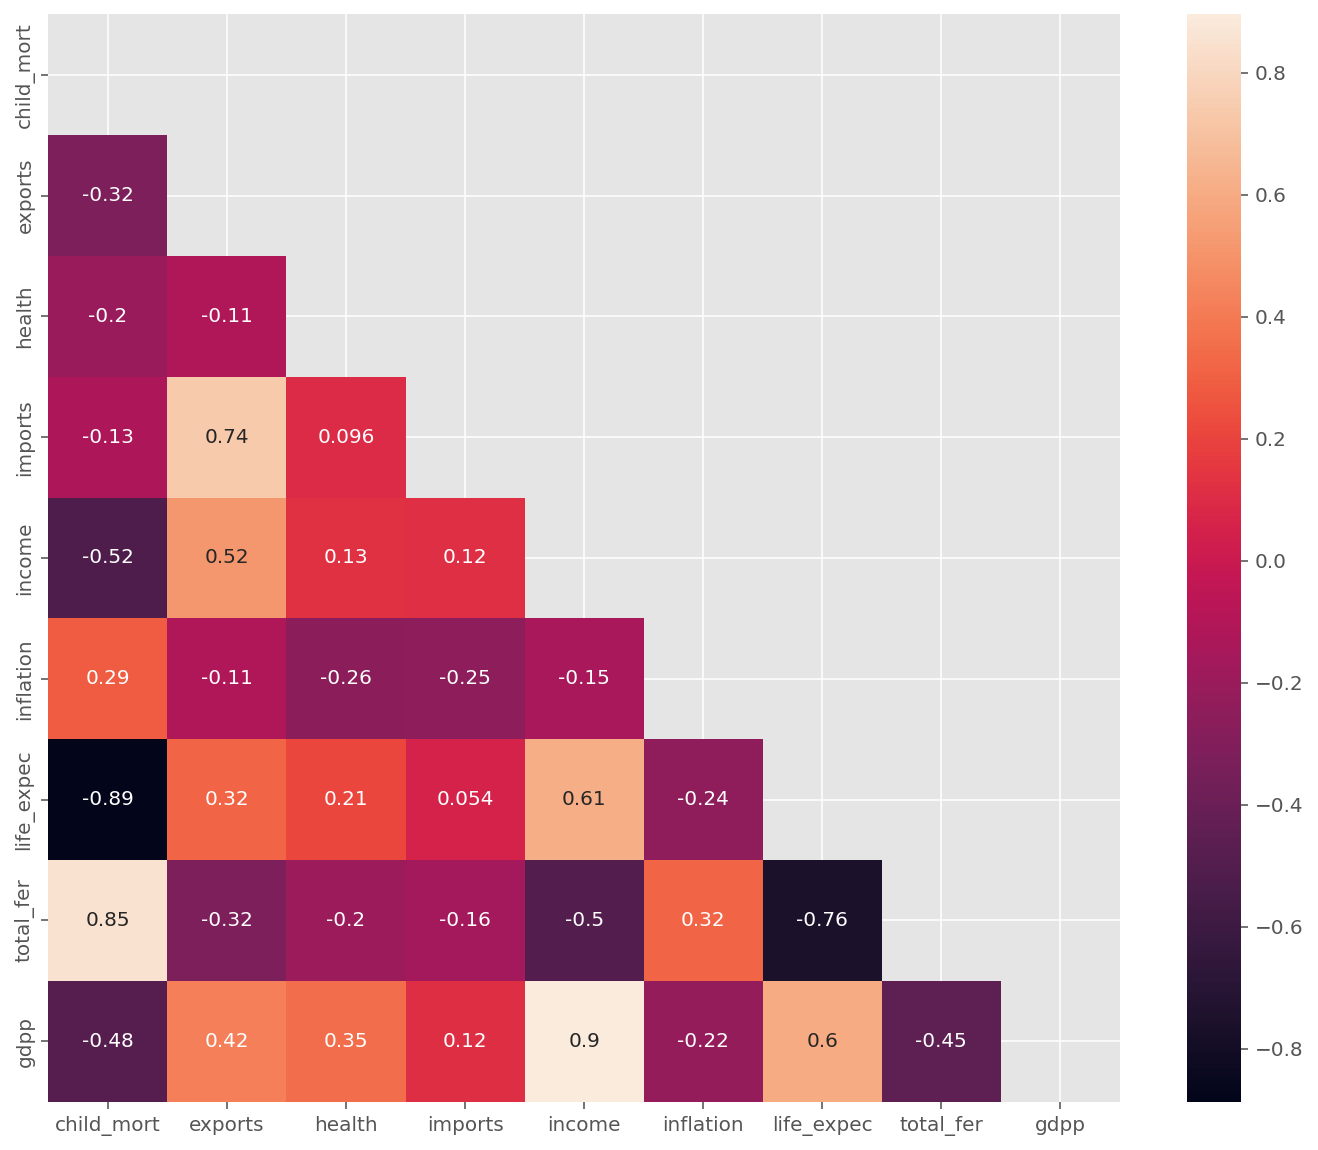

In [9]:
cm = X.corr()
mask = np.triu(cm)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, mask=mask)
plt.show()

### Задание 7.4
Теперь понизим размерность данных — возьмём для этого метод главных компонент (PCA) как самый простой и популярный.

Найдите минимальное число компонент, которые суммарно могут объяснить как минимум 90 % разброса данных.

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
X = pca.fit_transform(X)
X

,pca0,pca1,pca2,pca3,pca4
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007
...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,-0.395748
163,-0.551036,-1.233886,3.101350,-0.115311,2.082581
164,0.498524,1.390744,-0.238526,-1.074098,1.176081
165,-1.887451,-0.109453,1.109752,0.056257,0.618365


### Задание 7.5
Используйте главные компоненты, выделенные в предыдущем задании.

Какую долю дисперсии объясняет первая главная компонента? Ответ округлите до двух знаков после точки-разделителя.

In [11]:
pd.DataFrame({'share': pca.explained_variance_ratio_}, index=X.columns).round(2)

,share
pca0,0.46
pca1,0.17
pca2,0.13
pca3,0.11
pca4,0.07


### Задание 7.6
Как вы помните, при создании компонент с помощью PCA они должны получиться независимыми, то есть мы не должны теперь наблюдать высоких коэффициентов корреляции.

Постройте матрицу корреляций. Сколько значений в ней превышают , не считая единичных значений на главной диагонали?

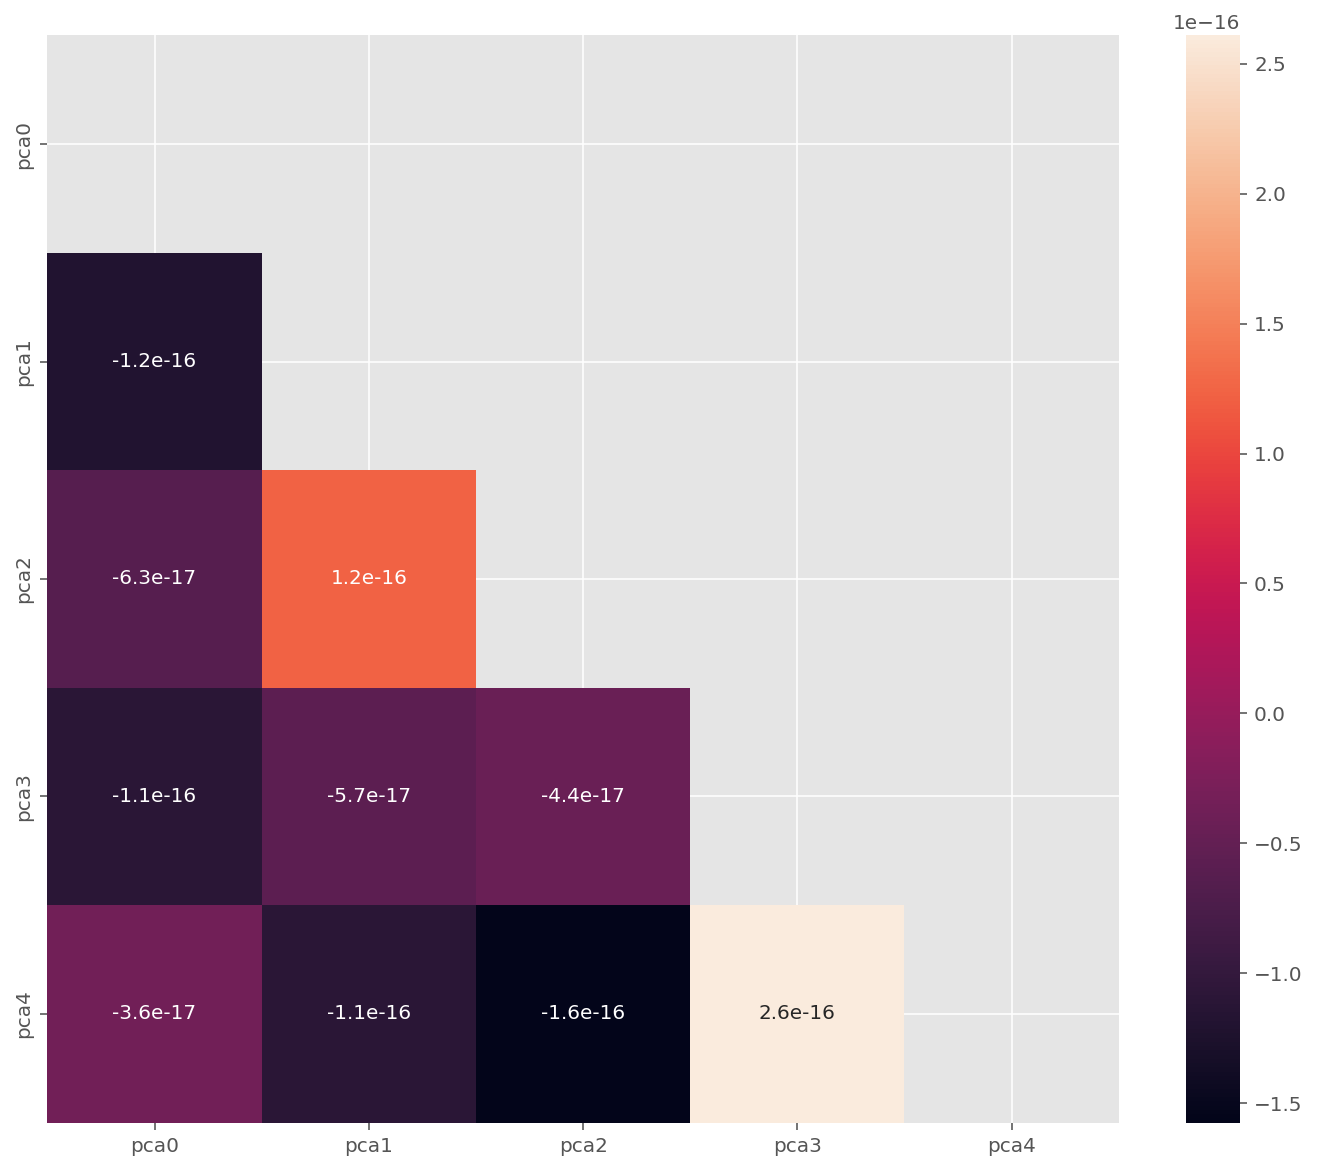

In [12]:
cm = X.corr()
mask = np.triu(cm)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, mask=mask)
plt.show()

### Задание 7.7
Теперь, когда мы уменьшили размерность данных, можно переходить к кластеризации. Подберите оптимальное количество кластеров с помощью коэффициента силуэта, перебирая возможные значения от 2 до 10 включительно. Для кластеризации используйте алгоритм k-means++. В качестве значения параметра random_state возьмите число 1.

Судя по полученным результатам, сколько кластеров лучше всего взять

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

clusters = list(range(2, 11))

def get_score(scorer, X, n_clusters):
    model = KMeans(n_clusters=n_clusters, random_state=1)
    model.fit(X)
    return scorer(X, model.labels_)

## Коэффициент силуэта

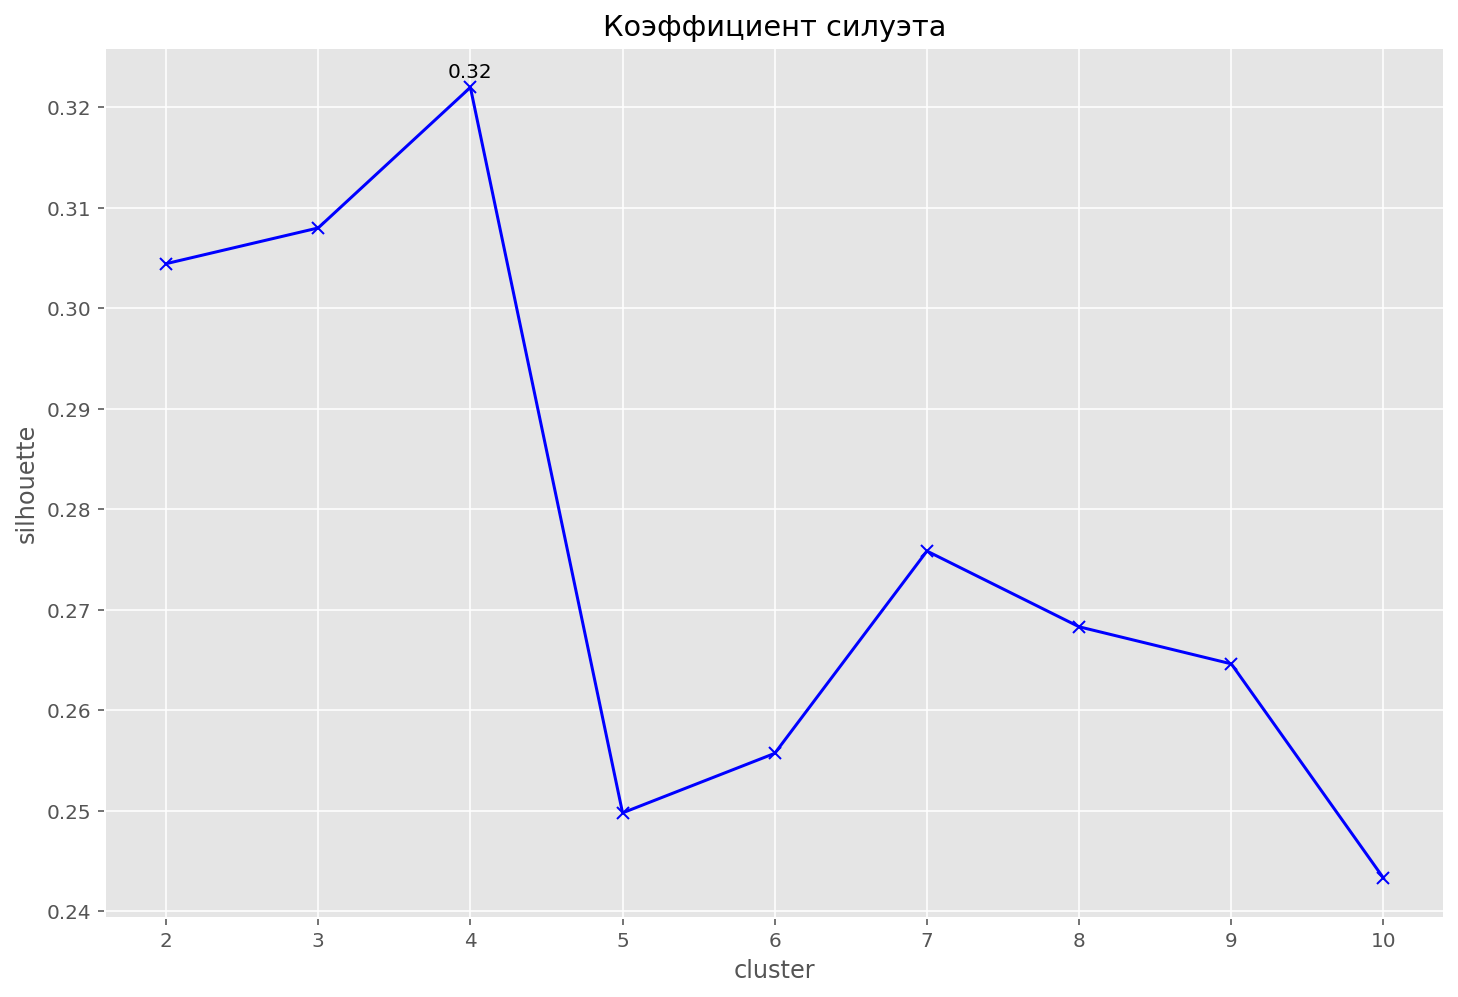

In [29]:
scores = []

for n_clusters in clusters:
    scores.append(get_score(silhouette_score, X, n_clusters))
plt.xlabel('cluster', fontsize=12)
plt.ylabel('silhouette', fontsize=12)
plt.title('Коэффициент силуэта')
plt.plot(clusters, scores, 'xb-')

max_score_index = np.argmax(scores)
plt.text(clusters[max_score_index], 
         scores[max_score_index]+0.001, 
         f'{scores[max_score_index]:.2f}', 
         ha='center')
plt.show()

## Индекс Калински-Харабаса

In [15]:
scores = []

for n_clusters in clusters:
    scores.append(get_score(calinski_harabasz_score, X, n_clusters))

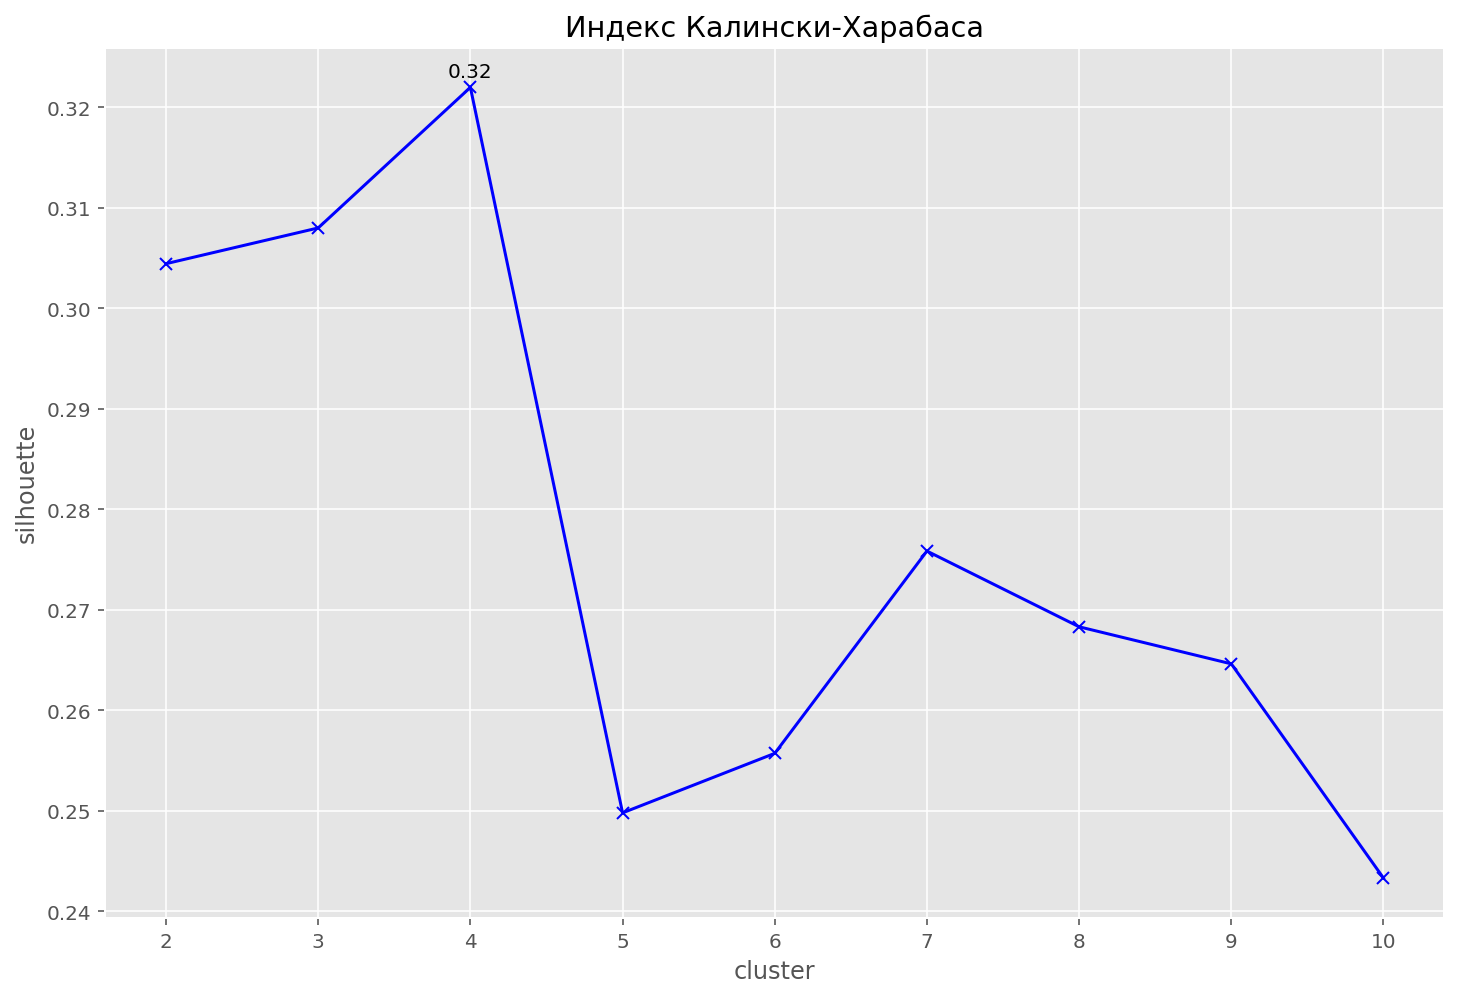

In [30]:
plt.xlabel('cluster', fontsize=12)
plt.ylabel('silhouette', fontsize=12)
plt.title('Индекс Калински-Харабаса')
plt.plot(clusters, scores, 'xb-')

max_score_index = np.argmax(scores)
plt.text(clusters[max_score_index],
         scores[max_score_index]+0.001, 
         f'{scores[max_score_index]:.2f}', 
         ha='center')
plt.show()

## Индекс Дэвиса-Болдина

In [17]:
scores = []

for n_clusters in clusters:
    scores.append(get_score(davies_bouldin_score, X, n_clusters))

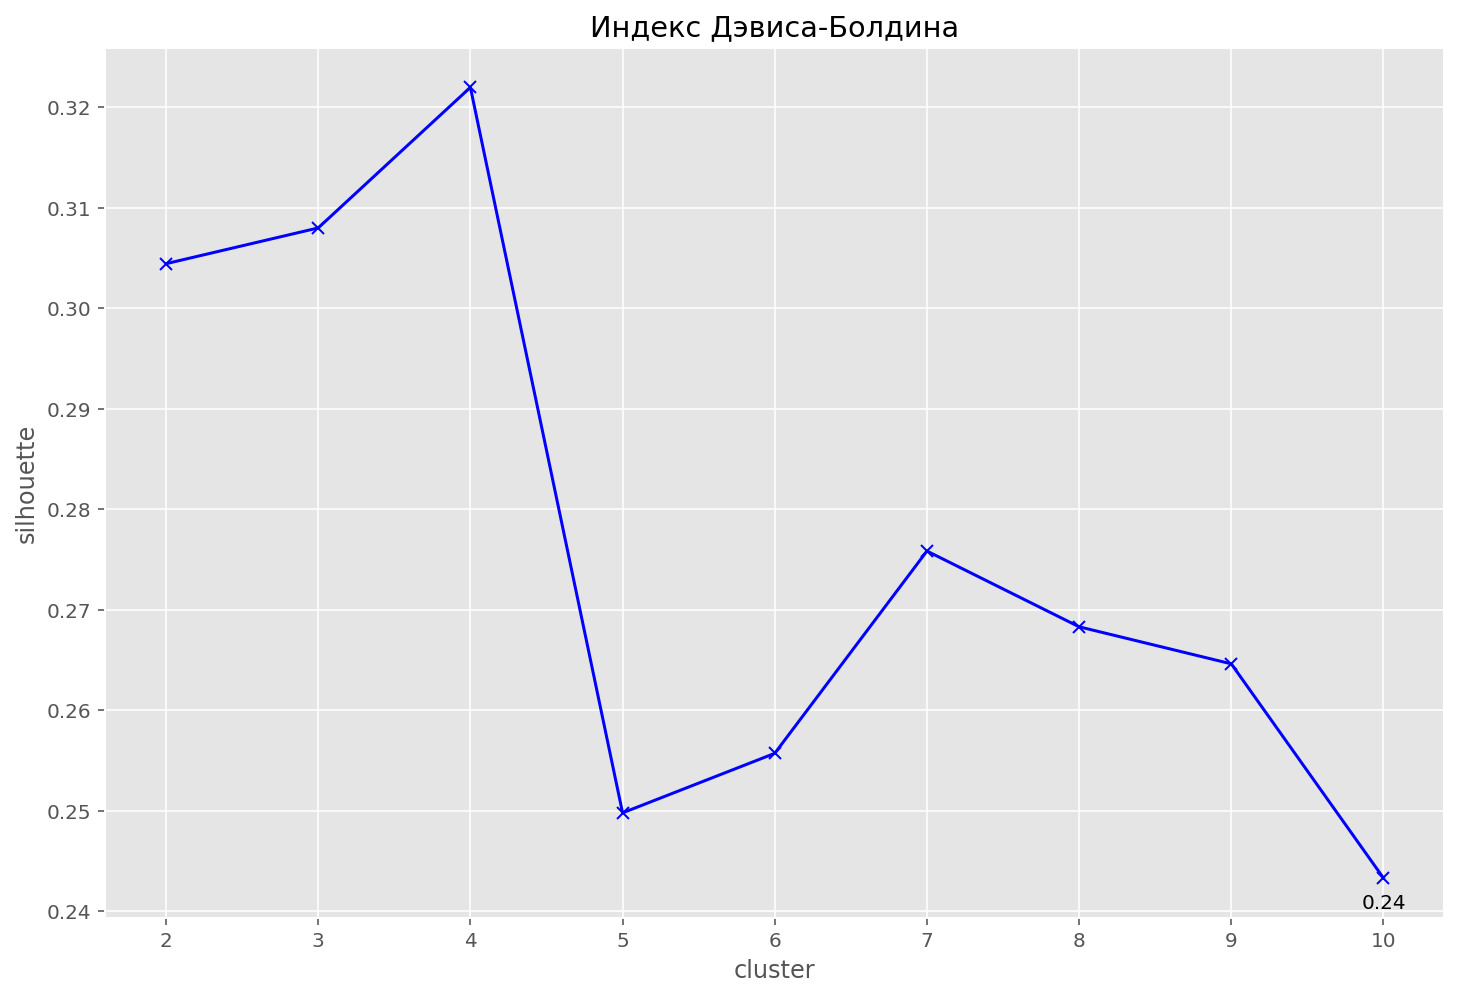

In [35]:
plt.xlabel('cluster', fontsize=12)
plt.ylabel('silhouette', fontsize=12)
plt.title('Индекс Дэвиса-Болдина')
plt.plot(clusters, scores, 'xb-')

min_score_index = np.argmin(scores)
plt.text(clusters[min_score_index], 
         scores[min_score_index]-0.003, 
         f'{scores[min_score_index]:.2f}', 
         ha='center')
plt.show()

### Задание 7.8
Теперь, когда оптимальное количество кластеров выбрано, реализуйте алгоритм k-means++ с этим параметром. В качестве значения random_state возьмите число 1.

В какой кластер попали страны, у которых самый высокий показатель детской смертности и самый низкий ВВП на душу населения?

In [19]:
model = KMeans(n_clusters=4, random_state=1)
labels = model.fit_predict(X)

In [20]:
new_df = df.copy()
new_df['labels'] = labels

In [21]:
max_child_mort_ind = new_df['child_mort'].idxmax()
new_df.loc[max_child_mort_ind]

country       Haiti
child_mort    208.0
exports        15.3
health         6.91
imports        64.7
income         1500
inflation      5.45
life_expec     32.1
total_fer      3.33
gdpp            662
labels            1
Name: 66, dtype: object

In [22]:
min_gdpp_ind = new_df['gdpp'].idxmin()
new_df.loc[min_gdpp_ind]

country       Burundi
child_mort       93.6
exports          8.92
health           11.6
imports          39.2
income            764
inflation        12.3
life_expec       57.7
total_fer        6.26
gdpp              231
labels              1
Name: 26, dtype: object

In [23]:
new_df[(new_df['child_mort'] == new_df['child_mort'].max()) | (new_df['gdpp'] == new_df['gdpp'].min())]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1
66,Haiti,208.0,15.30,6.91,64.7,1500,5.45,32.1,3.33,662,1


### Задание 7.9
Итак, мы понимаем, что именно в выбранном нами кластере находятся страны, которые особенно остро нуждаются в финансовой помощи. Однако на все страны у нас не хватит ресурсов, поэтому давайте выберем из выделенного кластера три страны, в которых самая маленькая продолжительность жизни.

In [24]:
new_df[new_df['labels'] == 1].sort_values(by='life_expec')['country'].values[:3].tolist()

['Haiti', 'Lesotho', 'Central African Republic']